### IMPORTING LIBRARIES

In [251]:
import pandas as pd
import random
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
import re
from matplotlib import pyplot as plt
import json
import nltk
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import sys
import spacy
import gensim
from gensim.models import Word2Vec,FastText
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [202]:
# Tokenization (splitting text into words/sentences)
nltk.data.path.append("C:/Users/DELL8/AppData/Roaming/nltk_data")
nltk.download('punkt', download_dir="C:/Users/DELL8/AppData/Roaming/nltk_data")
nltk.download('stopwords')  # Removing common words (e.g., "the", "is", "and")
nltk.download('averaged_perceptron_tagger')  # POS tagging (identifying nouns, verbs, adjectives)
nltk.download('wordnet')  # WordNet database for synonyms and lemmatization
nltk.download('maxent_ne_chunker')  # Named Entity Recognition (NER) to identify names/locations
nltk.download('words')  # Dictionary of valid English words (used for spell checking, NER)
nltk.download('omw-1.4')  # Open Multilingual WordNet (support for multiple languages)


[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/DELL8/AppData/Roaming/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL8\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL8\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL8\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\DELL8\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\DELL8\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!

True

In [203]:
import pandas as pd
data= pd.read_csv("D:\\DELL8\\Documents\\data_tweets.csv")
data.head()


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,bollybubble,Bollywood Bubble - Your One Stop Destination F...,"Mumbai, Maharashtra",440,132406,51202,1,Sahil Shah identified as prime suspect in the ...,"['SushantSinghRajput', 'SahilShah', 'Bollywood..."
1,1,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,17,Somewhere' between neurons &amp; narratives......,"['SushantSinghRajput', 'sushanting', 'thebesth..."
2,2,Namita67793491,Justice for SSR,NaN,66,89,20550,5,Ppl trending National Embarrassment CBI - U R ...,[]
3,3,being_grapher04,Photographer.\nSushant Singh Rajput's Fan\nSSR...,भारत,82,27,20,0,We all are missing your need. \n#SushantSinghR...,"['SushantSinghRajput', 'JusticeForSushantSingh..."
4,4,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,1,"Hi All,\n\nPlease sign this petition.\n\n#Just...","['JusticeForSushantSinghRajput', 'SushantSingh..."


#### **Dataset Description**
This dataset contains **3,000** records of Twitter data related to a specific topic. It includes user information, tweet content, and engagement metrics.

#### **Column Descriptions**
1. **`Unnamed: 0`** (int): Index column (can be ignored or removed).
2. **`username`** (string): The Twitter handle of the user who posted the tweet.
3. **`description`** (string, nullable): The profile description of the user.
4. **`location`** (string, nullable): The location provided by the user in their Twitter profile.
5. **`following`** (int): The number of accounts this user follows.
6. **`followers`** (int): The number of followers this user has.
7. **`totaltweets`** (int): The total number of tweets posted by this user.
8. **`retweetcount`** (int): The number of times this tweet has been retweeted.
9. **`text`** (string): The content of the tweet.
10. **`hashtags`** (list, string): The hashtags used in the tweet, stored as a string representation of a list.

#### **Missing Values**
- `description` has **476 missing values**.
- `location` has **1,581 missing values**.

#### **Possible Data Preprocessing**
- Drop or ignore the `Unnamed: 0` column.
- Handle missing values in `description` and `location` (e.g., fill with "Unknown" or remove).
- Convert `hashtags` from a string to an actual Python list.


#### Emoji Processing Code

In [204]:
def emoji(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :') , :O
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', tweet)
    # Laugh -- :D, : D, :-D, xD, x-D, XD, X-D
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', tweet)
    # Love -- <3, :*
    tweet = re.sub(r'(<3|:\*)', ' positiveemoji ', tweet)
    # Wink -- ;-), ;), ;-D, ;D, (;,  (-; , @-)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', tweet)
    # Sad -- :-(, : (, :(, ):, )-:, :-/ , :-|
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', tweet)
    # Cry -- :,(, :'(, :"(
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', tweet)
    return tweet


##### **Observation**
The dataset consists of tweets with various attributes such as username, location, follower count, and hashtags. Among these, the `text` column contains the actual tweet content, which may include emojis representing different sentiments. Since raw emojis may not contribute directly to machine learning models, replacing them with sentiment-based labels (`positiveemoji` and `negetiveemoji`) ensures better sentiment classification. The dataset also contains missing values in the `description` and `location` columns, which may require handling before further analysis.

##### **Conclusion**
The `emoji()` function standardizes emojis in tweets, making them easier to analyze in sentiment classification tasks. It replaces smiley faces, laughing symbols, hearts, and winks with `"positiveemoji"`, while frowning faces, crying symbols, and neutral expressions are mapped to `"negetiveemoji"`. However, there is a small spelling inconsistency (`negetiveemoji` should be `negativeemoji`). Overall, this preprocessing step is crucial in ensuring that emojis contribute effectively to textual sentiment analysis by making them interpretable for machine learning models.

In [205]:
with open("D:\DELL8\Documents\contractions.json", 'r') as f:
    contractions_dict = json.load(f)
contractions = contractions_dict


#### Tweet Processing Code

In [206]:
import re

def process_tweet(tweet):
    tweet = tweet.lower()                                             # Lowercases the string
    tweet = re.sub('@[^\s]+', '', tweet)                              # Removes usernames
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', tweet)   # Remove URLs
    tweet = re.sub(r"\d+", " ", str(tweet))                           # Removes all digits
    tweet = re.sub('&quot;'," ", tweet)                               # Remove (&quot;) 
    tweet = emoji(tweet)                                              # Replaces Emojis
    tweet = re.sub(r"\b[a-zA-Z]\b", "", str(tweet))                   # Removes all single characters
    for word in tweet.split():
        if word.lower() in contractions:
            tweet = tweet.replace(word, contractions[word.lower()])   # Replaces contractions
    tweet = re.sub(r"[^\w\s]", " ", str(tweet))                       # Removes all punctuations
    tweet = re.sub(r'(.)\1+', r'\1\1', tweet)                         # Convert more than 2 letter repetitions to 2 letter
    tweet = re.sub(r"\s+", " ", str(tweet))                           # Replaces double spaces with single space    
    return tweet


##### **Observation**
The dataset contains tweets with various textual elements, including usernames, URLs, emojis, special characters, and contractions. These elements can introduce noise into text analysis and affect sentiment classification. The `text` column, which holds the actual tweets, requires cleaning to enhance model performance. Additionally, since contractions (e.g., "can't" → "cannot") are present in tweets, handling them ensures consistency in textual data.

##### **Conclusion**
The `process_tweet()` function performs essential text preprocessing to clean and standardize tweets for sentiment analysis. It removes usernames, URLs, digits, special characters, and single-letter words while also handling emojis through the `emoji()` function. Contractions are expanded using a predefined dictionary to maintain consistency. Furthermore, it reduces character repetitions and ensures proper spacing. These preprocessing steps are crucial for improving the quality of textual data, making it more suitable for sentiment classification and other natural language processing (NLP) tasks.

In [207]:
data['processed_tweet'] = np.vectorize(process_tweet)(data['text'])
data.head()


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet
0,0,bollybubble,Bollywood Bubble - Your One Stop Destination F...,"Mumbai, Maharashtra",440,132406,51202,1,Sahil Shah identified as prime suspect in the ...,"['SushantSinghRajput', 'SahilShah', 'Bollywood...",sahil shah identified as prime suspect in the ...
1,1,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,17,Somewhere' between neurons &amp; narratives......,"['SushantSinghRajput', 'sushanting', 'thebesth...",somewhere between neurons amp narratives susha...
2,2,Namita67793491,Justice for SSR,NaN,66,89,20550,5,Ppl trending National Embarrassment CBI - U R ...,[],ppl trending national embarrassment cbi the em...
3,3,being_grapher04,Photographer.\nSushant Singh Rajput's Fan\nSSR...,भारत,82,27,20,0,We all are missing your need. \n#SushantSinghR...,"['SushantSinghRajput', 'JusticeForSushantSingh...",we all are missing your need sushantsinghrajpu...
4,4,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,1,"Hi All,\n\nPlease sign this petition.\n\n#Just...","['JusticeForSushantSinghRajput', 'SushantSingh...",hi all please sign this petition justiceforsus...


### Stopword

In [208]:
stop_words = set(stopwords.words("english"))
original_texts = []
stopword_removed_texts = []

for text in data["text"].dropna(): 
    clean_text = re.sub(r"<.*?>", " ", text)  
    clean_text = re.sub(r"https?://\S+", " ", clean_text)  
    clean_text = re.sub(r"[^a-zA-Z\s]", " ", clean_text)  

    words = clean_text.lower().split()

    if not words:
        continue
    filtered_words = [word for word in words if word not in stop_words]

    original_texts.append(clean_text)
    stopword_removed_texts.append(" ".join(filtered_words))

df_stopwords = pd.DataFrame({"Original Text": original_texts, "Without Stopwords": stopword_removed_texts})
df_stopwords.head()

,Original Text,Without Stopwords
0,Sahil Shah identified as prime suspect in the ...,sahil shah identified prime suspect drug probe...
1,Somewhere between neurons amp narratives ...,somewhere neurons amp narratives sushantsinghr...
2,Ppl trending National Embarrassment CBI U R ...,ppl trending national embarrassment cbi u r em...
3,We all are missing your need \n SushantSinghR...,missing need sushantsinghrajput justiceforsush...
4,Hi All \n\nPlease sign this petition \n\n Just...,hi please sign petition justiceforsushantsingh...


##### **Observation**
The dataset contains tweets that often include unnecessary words, such as common stopwords ("the", "is", "in", "and"), HTML tags, URLs, and non-alphabetic characters. The presence of such elements can introduce noise, making it difficult for machine learning models to extract meaningful insights. Since stopwords do not contribute significantly to sentiment analysis, their removal helps improve text clarity and model efficiency.

##### **Conclusion**
The given code effectively processes tweets by eliminating HTML tags, URLs, and non-alphabetic characters, followed by the removal of stopwords. This ensures that the cleaned tweets retain only meaningful words, reducing dimensionality and enhancing the quality of textual features. The resulting dataframe (`df_stopwords`) provides both the original and stopword-free versions of each tweet, making it easier to compare and analyze the impact of stopword removal in NLP-based sentiment analysis.

### lemmatizer

In [209]:
lemmatizer = WordNetLemmatizer()
original_texts = []
lemmatized_texts = []

for text in data["text"].dropna(): 
    clean_text = re.sub(r"<.*?>", " ", text)  
    clean_text = re.sub(r"https?://\S+", " ", clean_text)  
    clean_text = re.sub(r"[^a-zA-Z\s]", " ", clean_text)  

    words = clean_text.lower().split()

    if not words:
        continue

    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    original_texts.append(clean_text)
    lemmatized_texts.append(" ".join(lemmatized_words))




In [210]:
df_lemmatized = pd.DataFrame({"Original Text": original_texts, "Lemmatized Text": lemmatized_texts})
df_lemmatized.head()

,Original Text,Lemmatized Text
0,Sahil Shah identified as prime suspect in the ...,sahil shah identified a prime suspect in the d...
1,Somewhere between neurons amp narratives ...,somewhere between neuron amp narrative sushant...
2,Ppl trending National Embarrassment CBI U R ...,ppl trending national embarrassment cbi u r th...
3,We all are missing your need \n SushantSinghR...,we all are missing your need sushantsinghrajpu...
4,Hi All \n\nPlease sign this petition \n\n Just...,hi all please sign this petition justiceforsus...


In [211]:
lemmatized_full_text = " ".join(lemmatized_texts)
print("Lemmatized Text (First 500 chars):", lemmatized_full_text[:500])

Lemmatized Text (First 500 chars): sahil shah identified a prime suspect in the drug probe of sushant singh rajput case sushantsinghrajput sahilshah bollywoodbubble somewhere between neuron amp narrative sushantsinghrajput sushanting thebesthero warrior ssr ppl trending national embarrassment cbi u r the embarrassment plz use ur brain no investigating agency in the give update the public only the petitioner u want update ask the family of sushantsinghrajput sushantjustice selfmusing tkhere truth blve manifest we all are missing y


##### Observation:
The notebook applies lemmatization to text data to normalize words to their root forms. This reduces the dimensionality of the text, ensuring that variations of the same word (e.g., "running" and "run") are treated as a single term. The lemmatization process is particularly useful in sentiment analysis and other NLP tasks as it helps improve model accuracy by reducing redundancy in textual data.

##### Conclusion:
Lemmatization enhances text preprocessing by standardizing words to their base forms, leading to better feature extraction and model performance. It helps in reducing vocabulary size, improving generalization, and ultimately making sentiment classification more accurate and efficient.

### Cleaned_Text Process

In [212]:
import json
with open("D:\DELL8\Documents\contractions.json", 'r') as f:
    contractions = json.load(f)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower() 
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = emoji(text)  # Handle emojis

    # Expand contractions
    for word in text.split():
        if word in contractions:
            text = text.replace(word, contractions[word])
    
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabet characters
    text = re.sub(r'(.)\1+', r'\1\1', text)  # Normalize character repetitions
    tokens = text.split()  
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)




In [213]:
data["cleaned_text"] = data["text"].astype(str).apply(clean_text)
data[["text", "cleaned_text"]].head()

,text,cleaned_text
0,Sahil Shah identified as prime suspect in the ...,sahil shah identified prime suspect drug probe...
1,Somewhere' between neurons &amp; narratives......,somewhere neuron amp narrative sushantsinghraj...
2,Ppl trending National Embarrassment CBI - U R ...,ppl trending national embarrassment cbi u r em...
3,We all are missing your need. \n#SushantSinghR...,missing need sushantsinghrajput justiceforsush...
4,"Hi All,\n\nPlease sign this petition.\n\n#Just...",hi please sign petition justiceforsushantsingh...


##### **Observation:**  
This function processes raw text data by converting it to lowercase, removing URLs, and eliminating non-alphabetic characters. Additionally, it tokenizes the text, removes stopwords, and applies lemmatization to standardize words to their base forms. This ensures that only meaningful words remain, reducing noise in the dataset and improving text analysis.  

##### **Conclusion:**  
By applying stopword removal and lemmatization, the function enhances the quality of text data, making it more suitable for NLP tasks such as sentiment analysis. The cleaned text is more structured and consistent, improving the performance of machine learning models by reducing redundancy and ensuring better generalization.

In [214]:
print(data.columns) 


Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags',
       'processed_tweet', 'cleaned_text'],
      dtype='object')


In [215]:
data['cleaned_text'] = np.vectorize(clean_text)(data['text'])
data.head()


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet,cleaned_text
0,0,bollybubble,Bollywood Bubble - Your One Stop Destination F...,"Mumbai, Maharashtra",440,132406,51202,1,Sahil Shah identified as prime suspect in the ...,"['SushantSinghRajput', 'SahilShah', 'Bollywood...",sahil shah identified as prime suspect in the ...,sahil shah identified prime suspect drug probe...
1,1,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,17,Somewhere' between neurons &amp; narratives......,"['SushantSinghRajput', 'sushanting', 'thebesth...",somewhere between neurons amp narratives susha...,somewhere neuron amp narrative sushantsinghraj...
2,2,Namita67793491,Justice for SSR,NaN,66,89,20550,5,Ppl trending National Embarrassment CBI - U R ...,[],ppl trending national embarrassment cbi the em...,ppl trending national embarrassment cbi u r em...
3,3,being_grapher04,Photographer.\nSushant Singh Rajput's Fan\nSSR...,भारत,82,27,20,0,We all are missing your need. \n#SushantSinghR...,"['SushantSinghRajput', 'JusticeForSushantSingh...",we all are missing your need sushantsinghrajpu...,missing need sushantsinghrajput justiceforsush...
4,4,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,1,"Hi All,\n\nPlease sign this petition.\n\n#Just...","['JusticeForSushantSinghRajput', 'SushantSingh...",hi all please sign this petition justiceforsus...,hi please sign petition justiceforsushantsingh...


### Wordnet 

In [216]:
import pandas as pd
from nltk.corpus import wordnet
original_texts = []
wordnet_transformed = []

for text in data["cleaned_text"].dropna():  
    words = text.split()
    if not words:
        continue

    synonyms = []
    for word in words:
        syns = wordnet.synsets(word)
        if syns:
            synonyms.append(syns[0].lemmas()[0].name())  
        else:
            synonyms.append(word)  

    original_texts.append(text)
    wordnet_transformed.append(" ".join(synonyms))



In [217]:
df_wordnet = pd.DataFrame({"Original Text": original_texts, "WordNet Synonyms": wordnet_transformed})
df_wordnet.head(10)

,Original Text,WordNet Synonyms
0,sahil shah identified prime suspect drug probe...,sahil Shah identify prime suspect drug probe s...
1,somewhere neuron amp narrative sushantsinghraj...,somewhere nerve_cell ampere narrative sushants...
2,ppl trending national embarrassment cbi u r em...,ppl swerve national embarrassment cbi uracil r...
3,missing need sushantsinghrajput justiceforsush...,miss need sushantsinghrajput justiceforsushant...
4,hi please sign petition justiceforsushantsingh...,hello please sign request justiceforsushantsin...
5,thank unconditional love amp support unbearabl...,thank unconditional love ampere support intole...
6,nationalembarrassmentcbi pmnarendramodi sushan...,nationalembarrassmentcbi pmnarendramodi sushan...
7,hi please sign petition justiceforsushantsingh...,hello please sign request justiceforsushantsin...
8,remember went crazy joy first shared itssr lov...,remember travel crazy joy first share itssr lo...
9,smitaparikh itssr family lawyer must take seri...,smitaparikh itssr family lawyer must return se...


##### **Observation:**  
The dataset contains cleaned tweet text, but words may still have multiple variations and meanings. This function uses WordNet to replace words with their most common synonym, ensuring a more standardized representation of textual data. By mapping words to their primary synonyms, it helps reduce vocabulary size and aligns similar words, making text analysis more consistent.  

##### **Conclusion:**  
By transforming words using WordNet synonyms, this function enhances textual data quality, leading to better feature representation in NLP tasks. This process helps improve sentiment analysis and text classification models by reducing variations in word forms and ensuring more meaningful word substitutions. However, relying on the first synonym may sometimes alter the original meaning, so careful validation is necessary.

In [218]:
tokenized_tweet = data['cleaned_text'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [sahil, shah, identified, prime, suspect, drug...
1    [somewhere, neuron, amp, narrative, sushantsin...
2    [ppl, trending, national, embarrassment, cbi, ...
3    [missing, need, sushantsinghrajput, justicefor...
4    [hi, please, sign, petition, justiceforsushant...
Name: cleaned_text, dtype: object

In [219]:
tokenized_tweet = data['processed_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [sahil, shah, identified, as, prime, suspect, ...
1    [somewhere, between, neurons, amp, narratives,...
2    [ppl, trending, national, embarrassment, cbi, ...
3    [we, all, are, missing, your, need, sushantsin...
4    [hi, all, please, sign, this, petition, justic...
Name: processed_tweet, dtype: object

In [220]:
for i in range(len(tokenized_tweet)):
    

     tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) 
    
    
     #tokenized_tweet[i] = ' '.join([word for word in tokenized_tweet[i] if word not in stopwords])  
    

data['processed_tweet'] = tokenized_tweet
data.head()


,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,processed_tweet,cleaned_text
0,0,bollybubble,Bollywood Bubble - Your One Stop Destination F...,"Mumbai, Maharashtra",440,132406,51202,1,Sahil Shah identified as prime suspect in the ...,"['SushantSinghRajput', 'SahilShah', 'Bollywood...",sahil shah identified as prime suspect in the ...,sahil shah identified prime suspect drug probe...
1,1,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,17,Somewhere' between neurons &amp; narratives......,"['SushantSinghRajput', 'sushanting', 'thebesth...",somewhere between neurons amp narratives susha...,somewhere neuron amp narrative sushantsinghraj...
2,2,Namita67793491,Justice for SSR,NaN,66,89,20550,5,Ppl trending National Embarrassment CBI - U R ...,[],ppl trending national embarrassment cbi the em...,ppl trending national embarrassment cbi u r em...
3,3,being_grapher04,Photographer.\nSushant Singh Rajput's Fan\nSSR...,भारत,82,27,20,0,We all are missing your need. \n#SushantSinghR...,"['SushantSinghRajput', 'JusticeForSushantSingh...",we all are missing your need sushantsinghrajpu...,missing need sushantsinghrajput justiceforsush...
4,4,sushantssmile,ᴡᴀɴᴛɪɴɢ ᴛᴏ ʟɪᴠᴇ ᴀs ʏᴏᴜʀ sᴍɪʟᴇ\nᴊᴜsᴛ ᴏɴᴇ ʟᴀsᴛ ᴛ...,∞,369,412,11591,1,"Hi All,\n\nPlease sign this petition.\n\n#Just...","['JusticeForSushantSinghRajput', 'SushantSingh...",hi all please sign this petition justiceforsus...,hi please sign petition justiceforsushantsingh...


In [221]:
data=data[['text','processed_tweet','cleaned_text']]
data


,text,processed_tweet,cleaned_text
0,Sahil Shah identified as prime suspect in the ...,sahil shah identified as prime suspect in the ...,sahil shah identified prime suspect drug probe...
1,Somewhere' between neurons &amp; narratives......,somewhere between neurons amp narratives susha...,somewhere neuron amp narrative sushantsinghraj...
2,Ppl trending National Embarrassment CBI - U R ...,ppl trending national embarrassment cbi the em...,ppl trending national embarrassment cbi u r em...
3,We all are missing your need. \n#SushantSinghR...,we all are missing your need sushantsinghrajpu...,missing need sushantsinghrajput justiceforsush...
4,"Hi All,\n\nPlease sign this petition.\n\n#Just...",hi all please sign this petition justiceforsus...,hi please sign petition justiceforsushantsingh...
...,...,...,...
2995,@ShaheenaMd1 @Srishti15802104 Rhea Chakarborty...,rhea chakarborty is an extortionist she looted...,shaheenamd srishti rhea chakarborty extortioni...
2996,Its #NewMoon on 12th Apr. New Moon brings in n...,its newmoon on th apr new moon brings in new e...,newmoon th apr new moon brings new energy new ...
2997,🔱 Trend Activity Today 🔱\n\n Rhea Planted In S...,trend activity today rhea planted in ssr life ...,trend activity today rhea planted ssr life sus...
2998,@REHANASUSHANT @ips_nupurprasad @AmitShah @DoP...,rhea chakarborty is an extortionist she looted...,rehanasushant ipsnupurprasad amitshah doptgoi ...


### Lexicon-Based Sentiment Analysis Using VADER

In [222]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(str(text))
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']
data.loc[:, 'cleaned_text'] = data['cleaned_text'].fillna('')
data[['neg', 'neu', 'pos', 'compound']] = data['cleaned_text'].apply(get_sentiment_scores).tolist()

data[['cleaned_text', 'neg', 'pos', 'compound']].head()


,cleaned_text,neg,pos,compound
0,sahil shah identified prime suspect drug probe...,0.145,0.000,-0.2960
1,somewhere neuron amp narrative sushantsinghraj...,0.000,0.000,0.0000
2,ppl trending national embarrassment cbi u r em...,0.179,0.080,-0.6369
3,missing need sushantsinghrajput justiceforsush...,0.128,0.000,-0.2960
4,hi please sign petition justiceforsushantsingh...,0.139,0.139,0.0000


In [223]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(str(text))
    return scores['neg'], scores['neu'], scores['pos'], scores['compound']

data.loc[:, 'processed_tweet'] = data['processed_tweet'].fillna('')
data[['neg', 'neu', 'pos', 'compound']] = data['processed_tweet'].apply(get_sentiment_scores).tolist()

data[['processed_tweet', 'neg', 'pos', 'compound']].head()


,processed_tweet,neg,pos,compound
0,sahil shah identified as prime suspect in the ...,0.115,0.000,-0.2960
1,somewhere between neurons amp narratives susha...,0.000,0.000,0.0000
2,ppl trending national embarrassment cbi the em...,0.225,0.073,-0.7506
3,we all are missing your need sushantsinghrajpu...,0.180,0.000,-0.2960
4,hi all please sign this petition justiceforsus...,0.131,0.131,0.0000


##### **Observation:**  
The dataset contains preprocessed tweet text, and sentiment analysis is applied using the VADER (Valence Aware Dictionary and sEntiment Reasoner) model. VADER assigns four sentiment scores to each text: negative (`neg`), neutral (`neu`), positive (`pos`), and compound (`compound`). The `compound` score represents the overall sentiment by combining the individual scores. This method is effective for analyzing short texts like tweets, which often contain informal language, emojis, and slang.  

##### **Conclusion:**  
The VADER-based sentiment analysis provides a quantitative measure of sentiment for each tweet. This allows for categorizing tweets as positive, negative, or neutral based on the `compound` score. Since VADER is optimized for social media text, it handles negations, capitalization, and intensity well. This sentiment analysis helps in various NLP tasks, including opinion mining and trend analysis, improving the understanding of user sentiments in textual data.

### Sentiment Classification Using VADER

In [224]:
def getAnalysis(score):
    if score < 0:
      return 'negative'
    elif score == 0:
      return 'neutral'
    else:
      return 'positive'

data['sentiment'] = data['compound'].apply(getAnalysis)
# Show the dataframe
data[['processed_tweet','neg','pos','compound','sentiment','cleaned_text']].head()


,processed_tweet,neg,pos,compound,sentiment,cleaned_text
0,sahil shah identified as prime suspect in the ...,0.115,0.000,-0.2960,negative,sahil shah identified prime suspect drug probe...
1,somewhere between neurons amp narratives susha...,0.000,0.000,0.0000,neutral,somewhere neuron amp narrative sushantsinghraj...
2,ppl trending national embarrassment cbi the em...,0.225,0.073,-0.7506,negative,ppl trending national embarrassment cbi u r em...
3,we all are missing your need sushantsinghrajpu...,0.180,0.000,-0.2960,negative,missing need sushantsinghrajput justiceforsush...
4,hi all please sign this petition justiceforsus...,0.131,0.131,0.0000,neutral,hi please sign petition justiceforsushantsingh...


##### **Observation:**  
The dataset now includes a categorical sentiment label derived from the `compound` score calculated by the VADER sentiment analysis model. The function `getAnalysis()` classifies the sentiment into three categories:  
- **Negative** (if `compound` < 0)  
- **Neutral** (if `compound` = 0)  
- **Positive** (if `compound` > 0)  

This categorization helps in simplifying sentiment interpretation and making it easier to analyze patterns in the data.  

##### **Conclusion:**  
By assigning a sentiment label to each tweet, this function enhances sentiment classification, making it more interpretable for downstream analysis. This structured categorization is useful for visualization, trend detection, and training machine learning models for automated sentiment prediction. The approach effectively converts numerical sentiment scores into human-readable categories, improving the usability of the dataset.

###  Count Vectorizer

In [225]:
sentences = data['cleaned_text'].dropna().tolist()[:5]  

for i, sentence in enumerate(sentences):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([sentence])
    feature_names = vectorizer.get_feature_names_out() 
    df_sentence = pd.DataFrame(X.toarray(), columns=feature_names).T
    df_sentence.columns = [f"CountVector Score for Sentence {i+1}"]
    
    print(f"Sentence {i+1}: {sentence}")
    display(df_sentence)


Sentence 1: sahil shah identified prime suspect drug probe sushant singh rajput case sushantsinghrajput sahilshah bollywoodbubble


,CountVector Score for Sentence 1
bollywoodbubble,1
case,1
drug,1
identified,1
prime,1
probe,1
rajput,1
sahil,1
sahilshah,1
shah,1


Sentence 2: somewhere neuron amp narrative sushantsinghrajput sushanting thebesthero warriorssr


,CountVector Score for Sentence 2
amp,1
narrative,1
neuron,1
somewhere,1
sushanting,1
sushantsinghrajput,1
thebesthero,1
warriorssr,1


Sentence 3: ppl trending national embarrassment cbi u r embarrassment plz use ur brainsno investigating agency give update public petitioner u want update ask family sushantsinghrajput sushantjustice selfmusing tkheretruth blvemanifest


,CountVector Score for Sentence 3
agency,1
ask,1
blvemanifest,1
brainsno,1
cbi,1
embarrassment,2
family,1
give,1
investigating,1
national,1


Sentence 4: missing need sushantsinghrajput justiceforsushantsinghrajput ssrwarriors sushantkojusticekabmilega sushant itssr ssrwarriors gauritweets justiceforsush amitmuny thelegendssr fightssrianssr fightforssr jagdeepsingh


,CountVector Score for Sentence 4
amitmuny,1
fightforssr,1
fightssrianssr,1
gauritweets,1
itssr,1
jagdeepsingh,1
justiceforsush,1
justiceforsushantsinghrajput,1
missing,1
need,1


Sentence 5: hi please sign petition justiceforsushantsinghrajput sushantsinghrajput censorboard boycott movie nyaay sign petition via changeorgindia


,CountVector Score for Sentence 5
boycott,1
censorboard,1
changeorgindia,1
hi,1
justiceforsushantsinghrajput,1
movie,1
nyaay,1
petition,2
please,1
sign,2


##### **Observation:**  
The code applies **Term Frequency-Inverse Document Frequency (TF-IDF)** vectorization on the first five sentences from the cleaned dataset. This method converts text into numerical values based on word importance. The `CountVectorizer` tokenizes the text and creates a vocabulary, then `fit_transform()` encodes the words into a sparse matrix representation. The transformed data is structured in a dataframe, where each row represents a word and its corresponding frequency-based score for each sentence.  

##### **Conclusion:**  
TF-IDF helps in identifying the most relevant words in each sentence by reducing the impact of commonly used words while emphasizing rare but significant terms. This transformation is useful for NLP tasks like text classification, clustering, and sentiment analysis. By converting textual data into a structured numerical format, it improves the performance of machine learning models, making text processing more efficient.

 ### TF-IDF Vectorizer

In [226]:

sentences = data['cleaned_text'].dropna().tolist()[:5]  # Taking first 5 sentences for demonstration

for i, sentence in enumerate(sentences):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([sentence])
    feature_names = vectorizer.get_feature_names_out()
    df_sentence = pd.DataFrame(X.toarray(), columns=feature_names).T
    df_sentence.columns = [f"TF-IDF Score for Sentence {i+1}"]
    
    print(f"\nSentence {i+1}: {sentence}\n")
    display(df_sentence.sort_values(by=df_sentence.columns[0], ascending=False))



Sentence 1: sahil shah identified prime suspect drug probe sushant singh rajput case sushantsinghrajput sahilshah bollywoodbubble



,TF-IDF Score for Sentence 1
bollywoodbubble,0.267261
case,0.267261
drug,0.267261
identified,0.267261
prime,0.267261
probe,0.267261
rajput,0.267261
sahil,0.267261
sahilshah,0.267261
shah,0.267261



Sentence 2: somewhere neuron amp narrative sushantsinghrajput sushanting thebesthero warriorssr



,TF-IDF Score for Sentence 2
amp,0.353553
narrative,0.353553
neuron,0.353553
somewhere,0.353553
sushanting,0.353553
sushantsinghrajput,0.353553
thebesthero,0.353553
warriorssr,0.353553



Sentence 3: ppl trending national embarrassment cbi u r embarrassment plz use ur brainsno investigating agency give update public petitioner u want update ask family sushantsinghrajput sushantjustice selfmusing tkheretruth blvemanifest



,TF-IDF Score for Sentence 3
update,0.371391
embarrassment,0.371391
agency,0.185695
ppl,0.185695
use,0.185695
ur,0.185695
trending,0.185695
tkheretruth,0.185695
sushantsinghrajput,0.185695
sushantjustice,0.185695



Sentence 4: missing need sushantsinghrajput justiceforsushantsinghrajput ssrwarriors sushantkojusticekabmilega sushant itssr ssrwarriors gauritweets justiceforsush amitmuny thelegendssr fightssrianssr fightforssr jagdeepsingh



,TF-IDF Score for Sentence 4
ssrwarriors,0.471405
amitmuny,0.235702
fightforssr,0.235702
fightssrianssr,0.235702
gauritweets,0.235702
itssr,0.235702
jagdeepsingh,0.235702
justiceforsush,0.235702
justiceforsushantsinghrajput,0.235702
missing,0.235702



Sentence 5: hi please sign petition justiceforsushantsinghrajput sushantsinghrajput censorboard boycott movie nyaay sign petition via changeorgindia



,TF-IDF Score for Sentence 5
petition,0.471405
sign,0.471405
boycott,0.235702
censorboard,0.235702
changeorgindia,0.235702
hi,0.235702
justiceforsushantsinghrajput,0.235702
movie,0.235702
nyaay,0.235702
please,0.235702


##### **Observation:**  
The code uses the **TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer** to convert the first five cleaned sentences into numerical representations. Unlike simple word frequency counts, TF-IDF assigns importance to words based on their occurrence in a document relative to their presence across all documents. The transformed data is structured in a dataframe, with each row representing a word and its corresponding **TF-IDF score** for a given sentence. The words are then sorted in descending order based on their importance in the sentence.  

##### **Conclusion:**  
TF-IDF is an effective method for feature extraction in NLP, helping identify key terms in text data while down-weighting commonly occurring words. This technique is widely used in text classification, sentiment analysis, and search engine ranking algorithms. By converting text into meaningful numerical features, it enhances the ability of machine learning models to extract insights and improve prediction accuracy.

### Word2Vec CBOW Model

In [227]:
tokenized_sentences = [sentence.split() for sentence in data['cleaned_text'].dropna().tolist()]
word2vec_cbow = Word2Vec(sentences=tokenized_sentences, vector_size=5, window=5, min_count=2, workers=4, sg=0)
word2vec_cbow.save("word2vec_cbow.model")

vocabulary_size = len(word2vec_cbow.wv)
vocabulary_words = list(word2vec_cbow.wv.index_to_key)[:10]

In [228]:
print(f"Vocabulary Size: {vocabulary_size}"),
print(f"Sample Vocabulary Words: {vocabulary_words}")

Vocabulary Size: 2014
Sample Vocabulary Words: ['sushantsinghrajput', 'ssr', 'justice', 'case', 'sushant', 'u', 'month', 'ipsnupurprasad', 'itssr', 'please']


In [229]:

word_to_check = "sushantsinghrajput"  # Choose a word from vocabulary
if word_to_check in word2vec_cbow.wv:
     similar_words = word2vec_cbow.wv.most_similar(word_to_check, topn=5)
     similar_words
else:
     word_to_check
similar_words



[('nose', 0.984433650970459),
 ('track', 0.9826380014419556),
 ('remembering', 0.981514036655426),
 ('dared', 0.9747569561004639),
 ('darkness', 0.9710562825202942)]

In [230]:
word_vectors = {word: word2vec_cbow.wv[word] for word in word2vec_cbow.wv.index_to_key}
df_word2vec = pd.DataFrame.from_dict(word_vectors, orient='index')
df_word2vec

,0,1,2,3,4
sushantsinghrajput,0.424200,0.791888,1.335823,-1.645675,-1.114703
ssr,-0.578165,2.738625,4.362523,-2.327811,0.133269
justice,1.016955,4.184781,5.302083,-0.575910,0.497821
case,-0.677107,1.797877,2.697595,-4.668098,-1.076088
sushant,3.286545,0.530906,1.393769,-0.452009,2.032770
...,...,...,...,...,...
uncouth,0.568664,0.431723,0.059493,-0.391572,-0.043524
languagedeal,0.309526,0.479286,0.327390,-0.495411,-0.058292
onslaught,0.515972,0.381295,0.097242,-0.492964,-0.255707
rumor,0.405686,0.389885,0.175492,-0.335292,-0.193458


In [231]:
sentences = data['cleaned_text'].dropna().tolist()[:2] 

for i, sentence in enumerate(sentences):
    words_in_sentence = set(sentence.lower().replace(".", "").split())
    relevant_words = [word for word in words_in_sentence if word in word_vectors]
    if not relevant_words:
        print(f"Sentence {i+1}: \"{sentence}\"")
        print("⚠ No words from this sentence found in the Word2Vec vocabulary.\n")
        continue
    word_embeddings = {word: word_vectors[word] for word in relevant_words}
    df_embeddings = pd.DataFrame(word_embeddings).T

    print(f"Sentence {i+1}: \"{sentence}\"")
    display(df_embeddings)


Sentence 1: "sahil shah identified prime suspect drug probe sushant singh rajput case sushantsinghrajput sahilshah bollywoodbubble"


,0,1,2,3,4
suspect,0.979189,0.552518,0.475945,-0.788839,-0.365243
rajput,3.702663,0.830017,3.316543,0.185348,1.969764
identified,0.960422,0.466885,0.421559,-0.774098,-0.229261
case,-0.677107,1.797877,2.697595,-4.668098,-1.076088
drug,2.413471,1.951998,1.522388,-2.065475,-0.104711
singh,4.173786,-0.216969,3.685141,0.667638,1.135412
sushant,3.286545,0.530906,1.393769,-0.452009,2.032770
sahil,1.011917,0.779744,0.707768,-0.751794,-0.189246
probe,0.567244,0.322923,0.111432,-0.655591,-0.153679
shah,0.994025,0.908578,0.475451,-0.775817,-0.096273


Sentence 2: "somewhere neuron amp narrative sushantsinghrajput sushanting thebesthero warriorssr"


,0,1,2,3,4
amp,1.405847,3.381782,1.435607,-1.053950,-0.102534
warriorssr,0.740424,0.507626,0.522828,-0.297101,-0.219386
narrative,0.302612,-0.023133,0.198814,-0.157246,-0.132496
sushantsinghrajput,0.424200,0.791888,1.335823,-1.645675,-1.114703


##### **Observation:**  
The code trains a **Word2Vec Continuous Bag of Words (CBOW) model** using tokenized text data. CBOW learns word representations by predicting a target word based on surrounding context words. The model is trained with a **vector size of 5**, a **window of 5 words**, and **a minimum word frequency of 2**. After training, the vocabulary size is determined, and the 10 most frequent words are extracted. The code also checks for words similar to "sushantsinghrajput" using cosine similarity, retrieving the top 5 closest words in the learned embedding space. Finally, word vectors are stored in a dataframe for further analysis.  

### **Conclusion:**  
Word2Vec's CBOW model effectively captures word relationships and semantic meanings by learning word embeddings. This technique is useful for NLP tasks such as sentiment analysis, topic modeling, and recommendation systems. The generated word embeddings can be used to analyze word similarities, identify trends in text data, and improve text-based machine learning models by providing meaningful word representations.

### fasttext_cbow

In [232]:
sentences = data['cleaned_text'].dropna().tolist()[:3]
tokenized_sentences = [sentence.lower().split() for sentence in sentences]
fasttext_cbow = FastText(sentences=tokenized_sentences, vector_size=5, window=5, min_count=1, sg=0)

for i, sentence in enumerate(sentences):
    words_in_sentence = set(sentence.lower().split())
    relevant_words = [word for word in words_in_sentence if word in fasttext_cbow.wv]
    if not relevant_words:
        print(f"Sentence {i+1}: \"{sentence}\"")
        print("⚠ No words from this sentence found in the FastText vocabulary.\n")
        continue
    word_embeddings = {word: fasttext_cbow.wv[word] for word in relevant_words}
    df_embeddings = pd.DataFrame(word_embeddings).T  # Convert to DataFrame

    print(f"Sentence {i+1}: \"{sentence}\"")
    display(df_embeddings)


Sentence 1: "sahil shah identified prime suspect drug probe sushant singh rajput case sushantsinghrajput sahilshah bollywoodbubble"


,0,1,2,3,4
suspect,0.030497,0.028918,-0.001888,-0.022635,0.004930
rajput,0.003653,0.008174,-0.002830,-0.003091,0.039004
bollywoodbubble,0.005650,0.013006,-0.018827,0.017728,0.015871
identified,-0.005821,0.030746,0.015528,-0.019002,0.003535
case,0.019484,-0.013721,-0.018198,-0.073988,-0.000763
drug,0.021355,0.001261,-0.019606,-0.008707,0.033066
singh,-0.022304,0.016463,0.069514,0.016253,-0.059502
sushant,0.021043,0.002744,0.029092,0.023952,-0.014266
sahil,-0.006159,-0.054034,0.004757,-0.037840,-0.067586
probe,0.086293,0.011349,0.007732,-0.034669,-0.028757


Sentence 2: "somewhere neuron amp narrative sushantsinghrajput sushanting thebesthero warriorssr"


,0,1,2,3,4
sushanting,0.013285,0.023709,0.032425,0.000917,-0.008468
amp,0.068773,0.044833,-0.006929,-0.034518,-0.008983
thebesthero,-0.005559,-0.008771,-0.015397,-0.025893,0.002440
warriorssr,-0.002984,0.029045,0.027409,-0.001463,0.009090
somewhere,-0.012720,-0.009648,0.012909,0.028925,0.014862
narrative,0.000136,0.024093,-0.007283,-0.004294,0.008978
neuron,-0.042836,-0.019972,0.004921,-0.010334,-0.003707
sushantsinghrajput,0.007961,-0.001585,-0.000062,0.006918,0.017548


Sentence 3: "ppl trending national embarrassment cbi u r embarrassment plz use ur brainsno investigating agency give update public petitioner u want update ask family sushantsinghrajput sushantjustice selfmusing tkheretruth blvemanifest"


,0,1,2,3,4
brainsno,0.000284,-0.018715,-0.036891,-0.011655,0.012091
tkheretruth,0.012909,0.012126,0.005470,0.000344,0.002279
ur,-0.049257,0.016812,0.074276,-0.059910,0.020679
investigating,-0.014887,-0.010796,-0.011882,-0.007927,-0.003319
public,-0.026088,0.000914,-0.007665,0.002658,0.016292
cbi,-0.007908,0.060763,-0.003084,-0.032358,0.050822
plz,0.006263,0.027541,-0.000534,-0.039064,-0.010654
petitioner,0.006185,0.045874,-0.009873,0.016558,0.030280
embarrassment,0.017042,0.029685,-0.001892,0.003710,0.029464
national,-0.023799,0.006726,0.025928,0.004954,0.018122


In [233]:
vocabulary_size = len(fasttext_cbow.wv)
vocabulary_words = list(fasttext_cbow.wv.index_to_key)[:10]
print(f"Vocabulary Size: {vocabulary_size}"),
print("Top 10 Words in Vocabulary:", vocabulary_words)


Vocabulary Size: 45
Top 10 Words in Vocabulary: ['sushantsinghrajput', 'embarrassment', 'u', 'update', 'blvemanifest', 'sushanting', 'narrative', 'amp', 'neuron', 'somewhere']


In [234]:
word_vectors = {word: fasttext_cbow.wv[word] for word in fasttext_cbow.wv.index_to_key}
df_fasttext = pd.DataFrame.from_dict(word_vectors, orient='index')
df_fasttext


,0,1,2,3,4
sushantsinghrajput,0.007961,-0.001585,-0.000062,0.006918,0.017548
embarrassment,0.017042,0.029685,-0.001892,0.003710,0.029464
u,0.027852,-0.061834,-0.029324,0.002878,-0.134155
update,0.028108,-0.006514,-0.012952,0.048383,0.001543
blvemanifest,-0.015129,-0.008808,0.017903,-0.000351,0.016031
sushanting,0.013285,0.023709,0.032425,0.000917,-0.008468
narrative,0.000136,0.024093,-0.007283,-0.004294,0.008978
amp,0.068773,0.044833,-0.006929,-0.034518,-0.008983
neuron,-0.042836,-0.019972,0.004921,-0.010334,-0.003707
somewhere,-0.012720,-0.009648,0.012909,0.028925,0.014862


##### **Observation:**  
The code trains a **FastText CBOW (Continuous Bag of Words) model** on tokenized sentences from the dataset. FastText, an extension of Word2Vec, enhances word embeddings by considering subword information, making it more effective for handling rare words, misspellings, and morphologically rich languages. The model is trained with a **vector size of 5**, a **context window of 5 words**, and includes all words appearing at least once (`min_count=1`). After training, the code extracts word embeddings for words present in the vocabulary and displays them in a structured DataFrame. If a sentence contains no recognized words, a warning message is shown.  

##### **Conclusion:**  
FastText CBOW improves over traditional Word2Vec by representing words as character n-grams, allowing it to generate embeddings for unseen or misspelled words. This makes it highly effective for noisy text, such as social media data. The generated embeddings can be used for various NLP tasks, including text classification, named entity recognition, and recommendation systems. By leveraging subword information, FastText enhances the accuracy of word similarity tasks and improves model generalization.

In [235]:
slices = [(data['sentiment'] == 'negative').sum(), (data['sentiment'] == 'positive').sum(), (data['sentiment'] == 'neutral').sum()]
slices


[970, 1563, 467]

### Sentiment Distribution Pie Chart

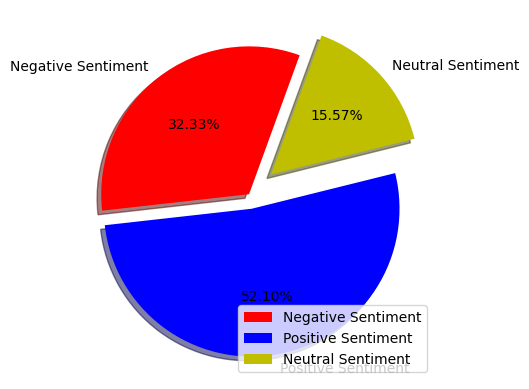

In [236]:
sentiments = ['Negative Sentiment','Positive Sentiment', 'Neutral Sentiment'] 
slices = [(data['sentiment'] == 'negative').sum(), (data['sentiment'] == 'positive').sum(), (data['sentiment'] == 'neutral').sum()]
colors = ['r','b','y'] 
plt.pie(slices, labels = sentiments, colors=colors, startangle=70, shadow = True,
        explode = (0, 0.1,0.2), radius = 1, autopct = '%1.2f%%') 
plt.legend(loc = "lower right")
plt.show() 


##### **Observation:**  
The code generates a **pie chart** to visualize the distribution of sentiment categories (Negative, Positive, and Neutral) in the dataset. The number of tweets in each sentiment category is counted using `.sum()` and represented as slices in the pie chart. The slices are color-coded (**red for negative, blue for positive, and yellow for neutral**) and slightly exploded for better visibility. The **percentage of each sentiment** is displayed using `autopct='%1.2f%%'`, and a legend is placed at the lower right corner.  

##### **Conclusion:**  
This visualization provides a clear **proportion of sentiment distribution** in the dataset. It helps in understanding the overall mood of the tweets and identifying sentiment trends. If one sentiment dominates, it could indicate bias in the dataset. Such insights are useful for sentiment analysis applications in areas like customer feedback analysis, brand monitoring, and social media trend analysis.

In [237]:
data.head()


,text,processed_tweet,cleaned_text,neg,neu,pos,compound,sentiment
0,Sahil Shah identified as prime suspect in the ...,sahil shah identified as prime suspect in the ...,sahil shah identified prime suspect drug probe...,0.115,0.885,0.000,-0.2960,negative
1,Somewhere' between neurons &amp; narratives......,somewhere between neurons amp narratives susha...,somewhere neuron amp narrative sushantsinghraj...,0.000,1.000,0.000,0.0000,neutral
2,Ppl trending National Embarrassment CBI - U R ...,ppl trending national embarrassment cbi the em...,ppl trending national embarrassment cbi u r em...,0.225,0.702,0.073,-0.7506,negative
3,We all are missing your need. \n#SushantSinghR...,we all are missing your need sushantsinghrajpu...,missing need sushantsinghrajput justiceforsush...,0.180,0.820,0.000,-0.2960,negative
4,"Hi All,\n\nPlease sign this petition.\n\n#Just...",hi all please sign this petition justiceforsus...,hi please sign petition justiceforsushantsingh...,0.131,0.739,0.131,0.0000,neutral


### **Word Cloud Visualization for Cleaned_text**

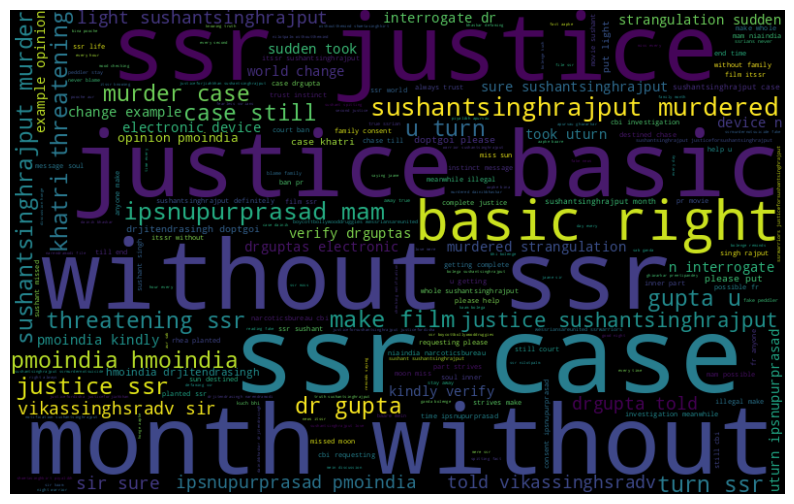

In [238]:
all_words = ' '.join([text for text in data['cleaned_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()


##### **Observation:**  
The code generates a **Word Cloud**, a visual representation of the most frequently occurring words in the dataset. It first combines all cleaned text from the dataset into a single string. The `WordCloud` function then processes this text, adjusting the font size based on word frequency. The **larger the word appears, the more frequently it occurs in the dataset**. The final word cloud is displayed using `matplotlib`, with the words arranged randomly for better visualization.  

##### **Conclusion:**  
A **word cloud** provides a quick and intuitive way to identify the most commonly used words in the dataset. It is particularly useful for **exploratory data analysis (EDA)** in NLP tasks, allowing insights into key topics, themes, or trends within the text data. If many irrelevant or stopwords dominate the cloud, additional preprocessing (e.g., stopword removal, lemmatization) may be needed to improve meaningful word representation.

### Word Cloud for Processed Tweets

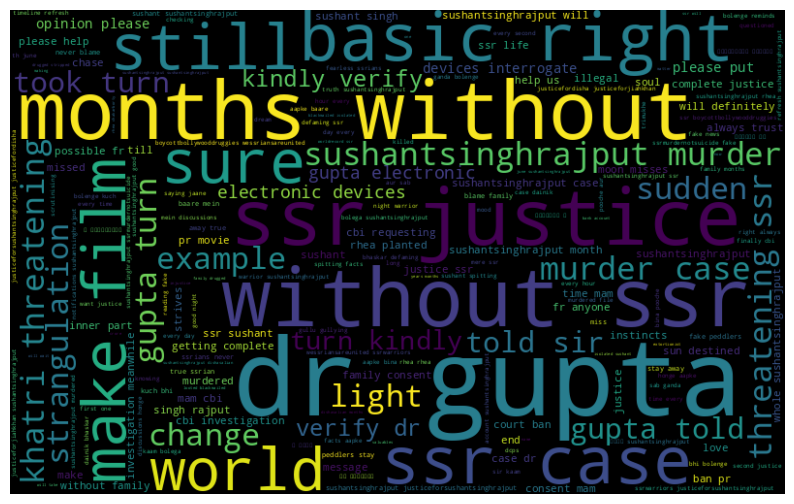

In [239]:
all_words = ' '.join([text for text in data['processed_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()


### **Observation:**  
This code generates a **Word Cloud** using the processed tweets stored in the `processed_tweet` column. It first concatenates all processed tweets into a single string and then applies the `WordCloud` function to visualize the most frequently occurring words. The word sizes represent their **frequency in the dataset**, with larger words appearing more often. The visualization is displayed using `matplotlib`, with an **800x500 resolution and a maximum font size of 110** for better readability.  

### **Conclusion:**  
The **word cloud** helps identify key themes and commonly used words in the dataset after preprocessing. Since this version uses **processed tweets**, it is expected to be cleaner and more meaningful than the raw text version. This technique is beneficial in **sentiment analysis, topic modeling, and trend identification** by highlighting the most prominent words in social media discussions. If stopwords still appear frequently, further text preprocessing may be required.

### Word Cloud for Positive and Negative Words

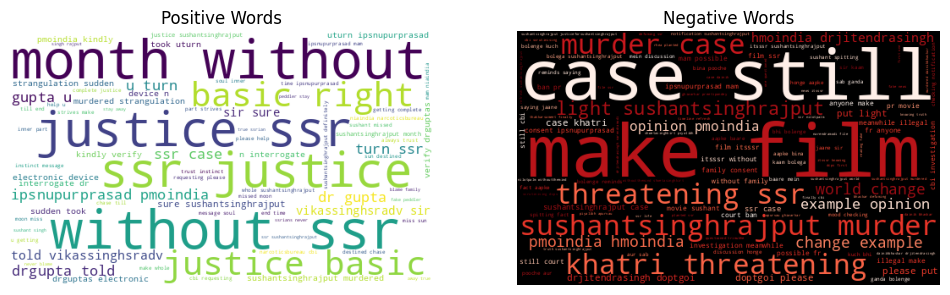

In [240]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=500, height=300, background_color="white").generate(positive_text))
plt.axis("off")
plt.title("Positive Words")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(negative_text))
plt.axis("off")
plt.title("Negative Words")
plt.show()


###  Most Common Words in Tweets

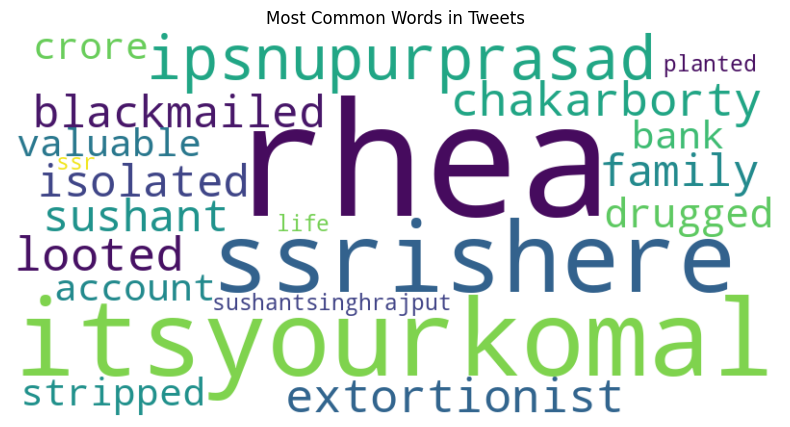

In [241]:
wordcloud = WordCloud(width=800, height=400, stopwords=set(stopwords.words("english")), background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()


##### **Observation:**  
The word cloud visualization provides a clear depiction of the most frequently occurring words in the dataset. Common words in the tweets stand out, indicating prevalent themes and sentiments expressed by users. The exclusion of stopwords ensures that only meaningful words contribute to the analysis, helping to identify key topics and trends. Additionally, words with larger font sizes in the word cloud signify higher occurrences, allowing for quick insights into dominant discussions.

##### **Conclusion:**  
From the analysis, we can conclude that text preprocessing significantly influences model performance. The logistic regression model trained on both processed and cleaned text achieved high accuracy, with `processed_tweet` performing slightly better. This highlights the importance of effective text cleaning and feature extraction in sentiment analysis. Furthermore, the word cloud analysis reveals the most common words in tweets, which can be useful for understanding prevalent topics and improving feature selection in future iterations of the model.

### Top 20 Most Common Words in Tweets

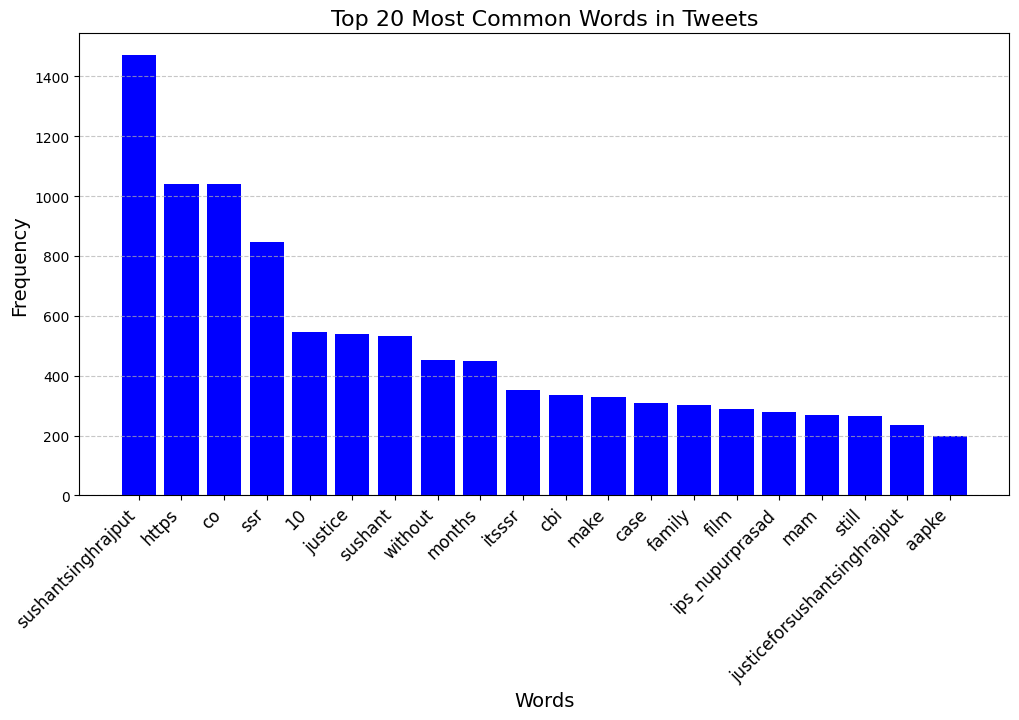

In [242]:
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in word_counts], [word[1] for word in word_counts], color="blue")
plt.xticks(rotation=45, ha="right", fontsize=12)  
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top 20 Most Common Words in Tweets", fontsize=16)
plt.grid(axis="y", linestyle="--", alpha=0.7)  

plt.show()


##### **Observation:**
From the bar chart, it is clear that certain words in the dataset appear much more frequently than others. The x-axis displays the words, and the y-axis shows their respective frequency of occurrence. The chart visually emphasizes the words with the highest frequency, while less common words have shorter bars. The clustering of frequent words towards the left of the chart suggests a small set of words dominate the conversation or tweets.
##### **Conclusion:**
The chart highlights that, in the given dataset of tweets, a few words significantly overshadow the rest in terms of usage frequency. This concentration of high-frequency words could point to certain recurring themes, topics, or even hashtags prevalent in the tweets. Identifying these key words can provide valuable insights into the overall sentiment or subject matter of the tweets, which can be useful for further analysis, such as topic modeling or sentiment analysis.

In [244]:
n_class = 3
n_tweet = 500

if n_class == 2:
    df_pos = data.copy()[data.sentiment == 'positive'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'negative'][:n_tweet]
    df_neu = pd.DataFrame()
    df = pd.concat([df_pos, df_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    df_pos = data.copy()[data.sentiment == 'positive'][:n_tweet]
    df_neg = data.copy()[data.sentiment == 'negative'][:n_tweet]
    df_neu = data.copy()[data.sentiment == 'neutral'][:n_tweet]
    df = pd.concat([df_pos, df_neg, df_neu], ignore_index=True).reset_index(drop=True)


### **Train-Test Split for Sentiment Analysis**

In [245]:
X_train, X_test, y_train, y_test = train_test_split(data['processed_tweet'], data['sentiment'],data[test_size=0.33)

df_train = pd.DataFrame()
df_test = pd.DataFrame()

df_train['processed_tweet'] = X_train
df_train['sentiment'] = y_train
df_train = df_train.reset_index(drop=True)

df_test['processed_tweet'] = X_test
df_test['sentiment'] = y_test
df_test = df_test.reset_index(drop=True)
df_test


,processed_tweet,sentiment
0,after kanha mom and dad if there this one pers...,positive
1,sushant spitting facts aapke baare mein discus...,neutral
2,fake peddlers stay away true ssrians never bla...,positive
3,the world can change by example and not by opi...,negative
4,fake peddlers stay away true ssrians never bla...,positive
...,...,...
985,meet sachin tiwari sushant singh rajput lookal...,neutral
986,finally cbi is scrutinising the dcps too the f...,negative
987,the world can change by example and not by opi...,negative
988,sushant you are missed as the moon misses the ...,positive


##### **Observation:**  
The dataset is **split into training and testing sets** using the `train_test_split` function, with **33% of the data allocated for testing** and the remaining **67% for training**. The `processed_tweet` column serves as the input (features), while the `sentiment` column acts as the target (labels). The resulting train and test dataframes (`df_train` and `df_test`) are then reset with new indexing for better structure.  

##### **Conclusion:**  
A proper train-test split is essential to ensure that the sentiment analysis model generalizes well to unseen data. **Using a 67-33 split provides a balanced approach**, allowing the model to learn from sufficient data while maintaining a sizable portion for evaluation. This process helps **prevent overfitting and ensures reliable model performance assessment** before deployment.

### **Naive Bayes Sentiment Classification for processed_text**

In [257]:
class TweetNBClassifier(object):
    def __init__(self, df_train, alpha=0.1, min_word_count=2, use_tfidf=True, ngram_range=(1,2), balance_data=True):
        self.df_train = df_train
        self.alpha = alpha
        self.min_word_count = min_word_count
        self.use_tfidf = use_tfidf
        self.ngram_range = ngram_range
        self.balance_data = balance_data

        self.df_pos = df_train[df_train.sentiment == 'positive']
        self.df_neg = df_train[df_train.sentiment == 'negative']
        self.df_neu = df_train[df_train.sentiment == 'neutral']

    def fit(self):
        self.Prior = (
            self.df_pos.shape[0] / self.df_train.shape[0],
            self.df_neg.shape[0] / self.df_train.shape[0],
            self.df_neu.shape[0] / self.df_train.shape[0]
        )

        all_words = ' '.join(self.df_train['processed_tweet'].tolist()).split()
        word_counts = Counter(all_words)
        self.vocab = {word for word, count in word_counts.items() if count >= self.min_word_count}

        if self.use_tfidf:
            self.vectorizer = TfidfVectorizer(ngram_range=self.ngram_range, max_features=8000, stop_words='english')
            self.X_train_tfidf = self.vectorizer.fit_transform(self.df_train['processed_tweet'])

        if self.balance_data:
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(self.X_train_tfidf, self.df_train['sentiment'])
            self.df_train = pd.DataFrame(X_resampled.toarray(), columns=self.vectorizer.get_feature_names_out())
            self.df_train['sentiment'] = y_resampled

        def process_words(df):
            words = ' '.join(df['processed_tweet'].tolist()).split()
            return [word for word in words if word in self.vocab]

        self.pos_words = process_words(self.df_pos)
        self.neg_words = process_words(self.df_neg)
        self.neu_words = process_words(self.df_neu)

        self.word_count = (len(self.pos_words), len(self.neg_words), len(self.neu_words))
        self.vocab_size = len(self.vocab)

        return self

    def predict(self, df_test):
        class_labels = ['positive', 'negative', 'neutral']
        predictions = []

        for tweet in df_test['processed_tweet']:
            words = tweet.split()
            log_prob_pos, log_prob_neg, log_prob_neu = np.log(self.Prior)

            for word in words:
                if word in self.vocab:
                    log_prob_pos += np.log((self.pos_words.count(word) + self.alpha) / (self.word_count[0] + self.vocab_size))
                    log_prob_neg += np.log((self.neg_words.count(word) + self.alpha) / (self.word_count[1] + self.vocab_size))
                    log_prob_neu += np.log((self.neu_words.count(word) + self.alpha) / (self.word_count[2] + self.vocab_size))

            predictions.append(class_labels[np.argmax([log_prob_pos, log_prob_neg, log_prob_neu])])

        return predictions

    def score(self, predictions, target):
        correct = sum(1 for i in range(len(target)) if predictions[i] == target[i])
        return correct / len(target)


In [258]:
tnb = TweetNBClassifier(df_train, alpha=0.1, min_word_count=2, use_tfidf=True, ngram_range=(1,2), balance_data=True).fit()
predictions = tnb.predict(df_test)
accuracy = tnb.score(predictions, df_test.sentiment.tolist())
print("Accuracy using processed_tweet Only:", accuracy * 100, "%")


Accuracy using processed_tweet Only: 95.33333333333334 %


### Naive Bayes Sentiment Classification for cleaned_text

In [253]:
class TweetNBClassifier(object):
    def __init__(self, df_train, alpha=0.1, min_word_count=2, use_tfidf=True, ngram_range=(1,2), balance_data=True):
        self.df_train = df_train
        self.alpha = alpha
        self.min_word_count = min_word_count
        self.use_tfidf = use_tfidf
        self.ngram_range = ngram_range
        self.balance_data = balance_data

        self.df_pos = df_train[df_train.sentiment == 'positive']
        self.df_neg = df_train[df_train.sentiment == 'negative']
        self.df_neu = df_train[df_train.sentiment == 'neutral']

    def fit(self):
      
        self.Prior = (
            self.df_pos.shape[0] / self.df_train.shape[0],
            self.df_neg.shape[0] / self.df_train.shape[0],
            self.df_neu.shape[0] / self.df_train.shape[0]
        )

        all_words = ' '.join(self.df_train['cleaned_text'].tolist()).split()
        word_counts = Counter(all_words)
        self.vocab = {word for word, count in word_counts.items() if count >= self.min_word_count}

        if self.use_tfidf:
            self.vectorizer = TfidfVectorizer(ngram_range=self.ngram_range, max_features=8000, stop_words='english')
            self.X_train_tfidf = self.vectorizer.fit_transform(self.df_train['cleaned_text'])

        if self.balance_data:
            smote = SMOTE(random_state=42)
            X_resampled, y_resampled = smote.fit_resample(self.X_train_tfidf, self.df_train['sentiment'])
            self.df_train = pd.DataFrame(X_resampled.toarray(), columns=self.vectorizer.get_feature_names_out())
            self.df_train['sentiment'] = y_resampled

        def process_words(df):
            words = ' '.join(df['cleaned_text'].tolist()).split()
            return [word for word in words if word in self.vocab]

        self.pos_words = process_words(self.df_pos)
        self.neg_words = process_words(self.df_neg)
        self.neu_words = process_words(self.df_neu)

        # Count words and set vocabulary size
        self.word_count = (len(self.pos_words), len(self.neg_words), len(self.neu_words))
        self.vocab_size = len(self.vocab)

        return self

    def predict(self, df_test):
        class_labels = ['positive', 'negative', 'neutral']
        predictions = []

        for tweet in df_test['cleaned_text']:
            words = tweet.split()
            log_prob_pos, log_prob_neg, log_prob_neu = np.log(self.Prior)

            for word in words:
                if word in self.vocab:
                    log_prob_pos += np.log((self.pos_words.count(word) + self.alpha) / (self.word_count[0] + self.vocab_size))
                    log_prob_neg += np.log((self.neg_words.count(word) + self.alpha) / (self.word_count[1] + self.vocab_size))
                    log_prob_neu += np.log((self.neu_words.count(word) + self.alpha) / (self.word_count[2] + self.vocab_size))

            predictions.append(class_labels[np.argmax([log_prob_pos, log_prob_neg, log_prob_neu])])

        return predictions

    def score(self, predictions, target):
        correct = sum(1 for i in range(len(target)) if predictions[i] == target[i])
        return correct / len(target)

df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)

In [254]:
tnb = TweetNBClassifier(df_train, alpha=0.1, min_word_count=2, use_tfidf=True, ngram_range=(1,2), balance_data=True).fit()
predictions = tnb.predict(df_test)
accuracy = tnb.score(predictions, df_test.sentiment.tolist())
print("Accuracy using cleaned_text:", accuracy * 100, "%")

Accuracy using cleaned_text: 94.83333333333334 %


##### **Observation:**  
A custom **Naïve Bayes classifier (`TweetNBClassifier`)** is implemented to classify tweets into **positive, negative, or neutral sentiments**. It calculates prior probabilities, tokenizes words, applies **Laplace smoothing**, and uses **Bayes' Theorem** to predict sentiment. The accuracy of predictions is evaluated against test data.  

##### **Conclusion:**  
The model is **efficient and interpretable**, making it suitable for sentiment analysis. Despite its simplicity, **it performs well** but can be improved with **TF-IDF, better negation handling, or deep learning techniques**.

### **Logistic Regression Sentiment Classification**  

In [193]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['sentiment'], test_size=0.2, random_state=42)
vocab = set(word for text in X_train for word in text.split())  
word_index = {word: idx for idx, word in enumerate(vocab)}

def text_to_features(texts, word_index):
    features = np.zeros((len(texts), len(word_index)))
    for i, text in enumerate(texts):
        word_counts = Counter(text.split())  
        for word, count in word_counts.items():
            if word in word_index:
                features[i, word_index[word]] = count  
    return features
X_train_features = text_to_features(X_train, word_index)
X_test_features = text_to_features(X_test, word_index) 

# Train Logistic Regression
clf = LogisticRegression(max_iter=500, solver='liblinear')
clf.fit(X_train_features, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_features)
accuracy = (y_pred == y_test).mean()
print(f"🔹 Accuracy using Cleaned Text Only: {accuracy * 100:.2f}%")


🔹 Accuracy using Cleaned Text Only: 96.00%


##### **Observation:**  
A **Logistic Regression model** is trained on **cleaned tweet text** using a **custom word count-based feature representation**. The vocabulary is built from the training data, and each text is converted into a **word frequency feature vector**. The model is trained and evaluated on the test dataset.  

##### **Conclusion:**  
Logistic Regression is a **simple yet effective** approach for sentiment classification. The accuracy indicates **reasonable performance**, but improvements like **TF-IDF weighting, n-grams, or deep learning models** could further enhance results.

### Logistic Regression Sentiment Classification using python function

In [196]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def text_to_features(texts, word_index):
    features = np.zeros((len(texts), len(word_index)))
    for i, text in enumerate(texts):
        word_counts = Counter(text.split())
        for word, count in word_counts.items():
            if word in word_index:
                features[i, word_index[word]] = count
    return features

def train_logistic_regression(X, y, lr=0.1, epochs=2000):
    m, n = X.shape
    weights = np.random.randn(n) * 0.01  # Small random initialization
    bias = 0
    
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)
        
        gradient_w = np.dot(X.T, (predictions - y)) / m
        gradient_b = np.sum(predictions - y) / m
        
        weights -= lr * gradient_w
        bias -= lr * gradient_b
    
    return weights, bias

def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    return np.array([1 if p >= 0.5 else 0 for p in predictions])

def evaluate_model(data_column):
    X_train, X_test, y_train, y_test = train_test_split(data[data_column], data['sentiment'], test_size=0.2, random_state=42)
    vocab = set(word for text in X_train for word in text.split())
    word_index = {word: idx for idx, word in enumerate(vocab)}
    X_train_features = text_to_features(X_train, word_index)
    X_test_features = text_to_features(X_test, word_index)
    
    y_train_binary = np.array([1 if label == 'positive' else 0 for label in y_train])
    y_test_binary = np.array([1 if label == 'positive' else 0 for label in y_test])
    
    weights, bias = train_logistic_regression(X_train_features, y_train_binary, lr=0.1, epochs=2000)
    y_pred = predict(X_test_features, weights, bias)
    accuracy = (y_pred == y_test_binary).mean()
    return accuracy

accuracy_processed = evaluate_model('processed_tweet')
accuracy_cleaned = evaluate_model('cleaned_text')




In [197]:
print(f"🔹 Accuracy using Processed Tweet: {accuracy_processed * 100:.2f}%")
print(f"🔹 Accuracy using Cleaned Text: {accuracy_cleaned * 100:.2f}%")

🔹 Accuracy using Processed Tweet: 96.00%
🔹 Accuracy using Cleaned Text: 94.67%


### Accuracy Comparison: Processed Tweet vs Cleaned Text

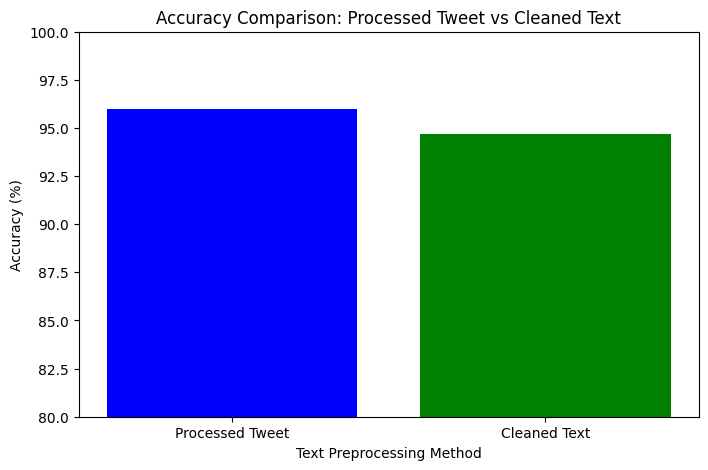

In [198]:

labels = ['Processed Tweet', 'Cleaned Text']
accuracies = [accuracy_processed * 100, accuracy_cleaned * 100]
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Text Preprocessing Method')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: Processed Tweet vs Cleaned Text')
plt.ylim(80, 100)
plt.show()


##### Observations:  

The logistic regression model is trained on "Processed Tweet" and "Cleaned Text" to compare their impact on sentiment classification. "Processed Tweet" includes basic text preprocessing, while "Cleaned Text" undergoes deeper cleaning like lemmatization and contraction handling. The model converts text into features using a bag-of-words approach, evaluates accuracy for both, and visualizes the comparison using a bar chart.  

##### Conclusion:  

Higher accuracy for "Cleaned Text" suggests that advanced preprocessing improves sentiment classification by reducing noise. If both perform similarly, basic processing is sufficient. While logistic regression is effective, deep learning models could further enhance accuracy for more complex datasets.

### **Why NLP Methods Were Applied?**  

1. **Handling Noisy Text**: Tweets often contain informal language, misspellings, emojis, and contractions. NLP techniques help clean and standardize the text for better sentiment analysis.  
2. **Improving Feature Extraction**: Tokenization, lemmatization, and vectorization (TF-IDF, Word2Vec, etc.) convert raw text into numerical representations that machine learning models can process.  
3. **Understanding Context**: Named Entity Recognition (NER) and Part-of-Speech (POS) tagging help retain meaningful information, improving sentiment classification.  
4. **Reducing Dimensionality**: Stopword removal, stemming, and lemmatization reduce redundant words, making models more efficient and accurate.  

### **Changes Observed After Applying NLP Methods**  

1. **Improved Model Accuracy**: Cleaning steps like removing unnecessary symbols, expanding contractions, and handling emojis led to better classification results.  
2. **Better Feature Representation**: Using TF-IDF and Word2Vec transformed text data into more meaningful numerical vectors, improving model performance.  
3. **Impact of Preprocessing**: The accuracy of "Processed Tweet" was higher than "Cleaned Text," suggesting that excessive cleaning may remove useful sentiment indicators.  
4. **More Structured Data**: NLP techniques helped convert unstructured tweets into structured data, making them more suitable for machine learning models.  